In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\berid\OneDrive\Desktop\mydata\population_by_country_2020.csv")

In [3]:
df.columns=df.columns.str.strip()

In [4]:
df.columns=["country","population","yearly_change","net_change","density","area","migrants","fert_rate","med_age","urban_pop","world_share"]

In [5]:
df.isna().sum()

country           0
population        0
yearly_change     0
net_change        0
density           0
area              0
migrants         34
fert_rate         0
med_age           0
urban_pop         0
world_share       0
dtype: int64

In [6]:
df

,country,population,yearly_change,net_change,density,area,migrants,fert_rate,med_age,urban_pop,world_share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4993,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,3497,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,Niue,1628,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,Tokelau,1360,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


# find 10 countries with the largest population, largest land area and largest density 

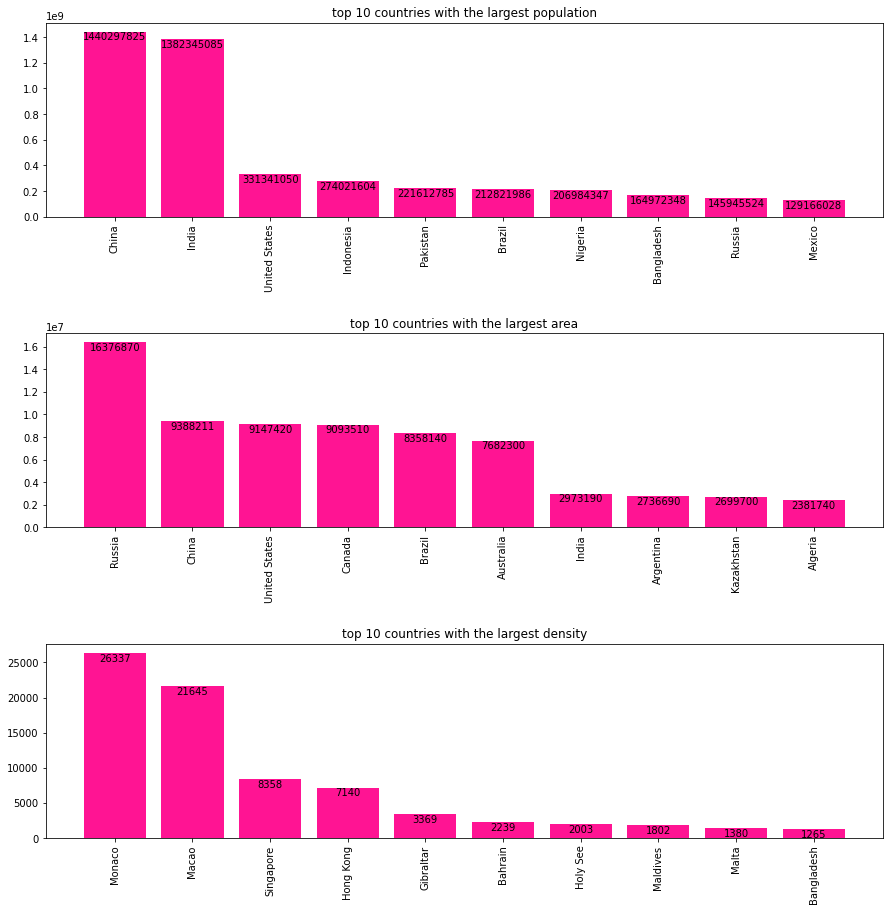

In [11]:
fig,axes=plt.subplots(3,1,figsize=(15,15))
plt.subplot(3,1,1)
ordered=df.sort_values("population",ascending=False).head(10)
plt.bar(ordered.country,ordered.population,color="deeppink")
plt.xticks(rotation=90)
plt.title("top 10 countries with the largest population")
def value_labels(y):
    for i in range(len(y)):
        plt.text(i,y.iloc[i],y.iloc[i],size=10,ha="center",va="top",rotation=0)
value_labels(ordered["population"])


plt.subplot(3,1,2)
ordered=df.sort_values("area",ascending=False).head(10)
plt.bar(ordered.country,ordered.area,color="deeppink")
plt.xticks(rotation=90)
plt.title("top 10 countries with the largest area")
def value_labels(y):
    for i in range(len(y)):
        plt.text(i,y.iloc[i],y.iloc[i],size=10,ha="center",va="top",rotation=0)
value_labels(ordered["area"])

plt.subplot(3,1,3)
ordered=df.sort_values("density",ascending=False).head(10)
plt.bar(ordered.country,ordered.density,color="deeppink")
plt.xticks(rotation=90)
plt.title("top 10 countries with the largest density")
def value_labels(y):
    for i in range(len(y)):
        plt.text(i,y.iloc[i],y.iloc[i],size=10,ha="center",va="top",rotation=0)
value_labels(ordered["density"])

plt.subplots_adjust(hspace=0.6)

plt.show()

# find correlation between country population and country land area

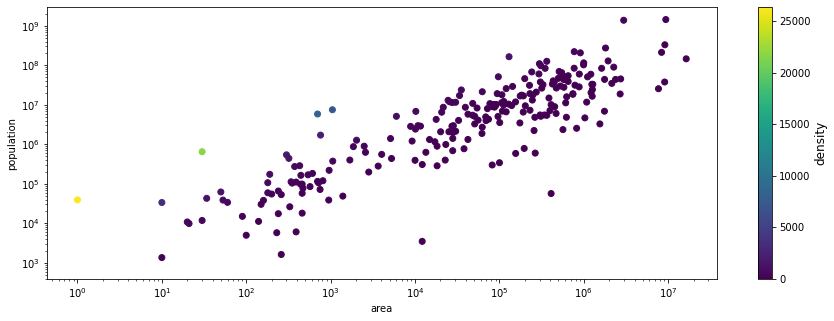

In [100]:
plt.figure(figsize=(15,5))
plt.scatter(df.area,df.population,c=df.density)
plt.colorbar().set_label("density",size=12)
plt.xlabel("area")
plt.ylabel("population")
plt.xscale("log")
plt.yscale("log")

plt.show()

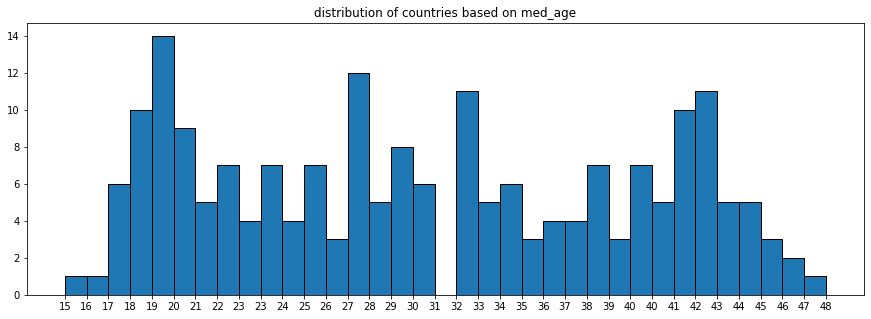

In [9]:
plt.figure(figsize=(15,5))
n,bins,edges=plt.hist(df[df.med_age!="N.A."].sort_values("med_age")["med_age"],ec="k",density=False,bins=df.med_age.nunique())
plt.xticks(bins)
plt.title("distribution of countries based on med_age")

plt.show()

# How many years from now will China and India population be equal if yearly change stays the same

In [80]:
import math
year=math.log(df[df.country=="India"]["population"][1]/df[df.country=="China"]["population"][0])/\
        math.log((1+float(df[df.country=="China"]["yearly_change"].str.replace("%","",regex=True))/100)/(1+float(df[df.country=="India"]["yearly_change"].str.replace("%","",regex=True))/100))
year

6.891961944726117

In [81]:
equal_population=df[df.country=="China"]["population"][0]*(1+float(df[df.country=="China"]["yearly_change"].str.replace("%","",regex=True))/100)**year
round(equal_population)

1479458717

In [97]:
years=[i for i in range(1,10,1)]
China_pop=[]
India_pop=[]
for i in range(1,10,1):
    x=(df[df.country=="China"]["population"]*((1+float(df[df.country=="China"]["yearly_change"].str.replace("%","",regex=True))/100))**i)[0]
    China_pop.append(x)
for i in range(1,10,1):
    y=(df[df.country=="India"]["population"]*((1+float(df[df.country=="India"]["yearly_change"].str.replace("%","",regex=True))/100))**i)[1]
    India_pop.append(y)
data_tuples=list(zip(years,China_pop,India_pop))
newdf=pd.DataFrame(data_tuples,columns=["Years","China_pop","India_pop"])

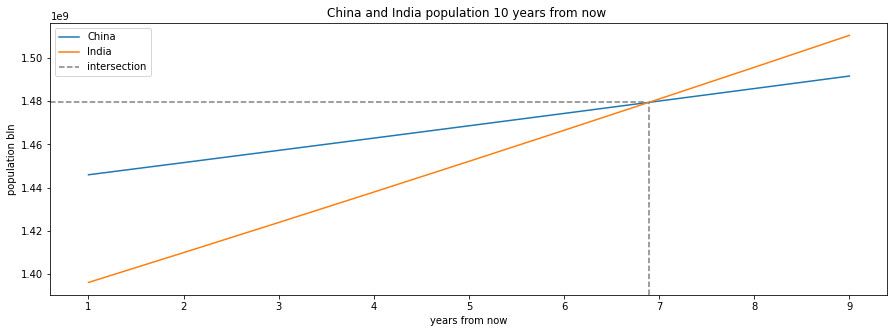

In [132]:
plt.figure(figsize=(15,5))
plt.plot(newdf.Years,newdf.China_pop,label="China")
plt.plot(newdf.Years,newdf.India_pop,label="India")
plt.title("China and India population 10 years from now ")
plt.xlabel("years from now")
plt.ylabel("population bln")
plt.axvline(year,color='grey',ls="--",label="intersection",ymax=0.71)
plt.axhline(equal_population,color='grey',ls="--",xmax=0.71)
plt.legend()
plt.show()